In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cases by country, with GDP per capita

In [16]:
# fetch covid-19 cases by country
covid_countries = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv")
covid_latest = covid_countries.loc[covid_countries["Date"] == covid_countries["Date"].max()]

# fetch GDP per capita
gdp = pd.read_csv("./data/gdp/gdp_cap.csv")
gdp = gdp[["Country Name", "2018"]]
gdp.columns = ["Country", "GDP_Cap"]

# join and save to csv
covid_latest = covid_latest.merge(gdp, on="Country")
covid_latest.to_csv("./output/covid19_latest.csv")

## State Data: NYT
https://github.com/nytimes/covid-19-data

In [2]:
states = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
ny = states.loc[states["state"] == "New York"]
ny["new_cases"] = ny["cases"].diff()
ny["new_cases_pct"] = ny["cases"].pct_change()

/Users/austinrochon/Documents/6.Harvard/harvard-coursework/ac209a/labs/lab1/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/austinrochon/Documents/6.Harvard/harvard-coursework/ac209a/labs/lab1/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


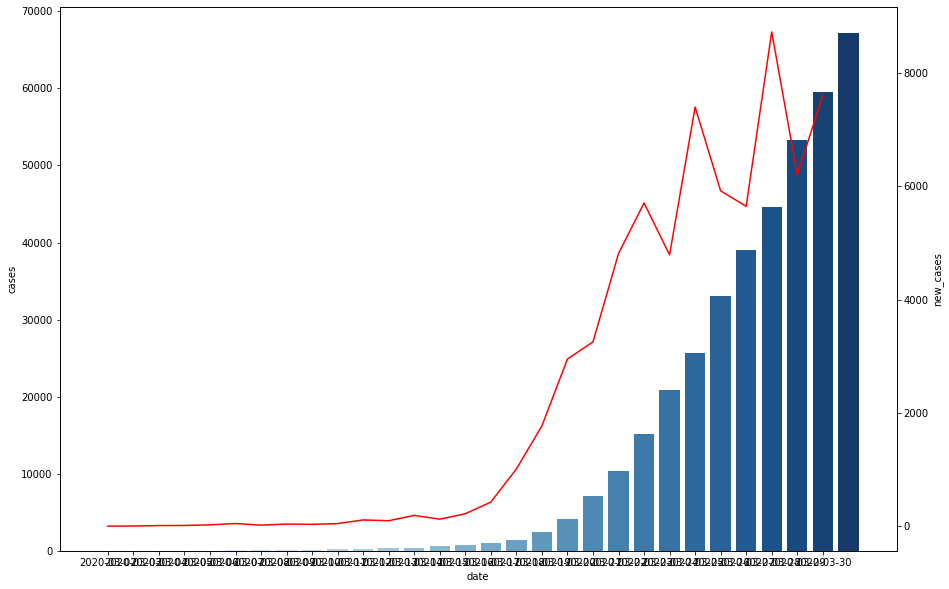

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="date", y="cases", data=ny, palette="Blues", ax=ax)
ax2 = ax.twinx()
sns.lineplot(x="date", y="new_cases", data=ny, color="Red", ax=ax2)


plt.xticks(rotation=45);


## Testing

In [11]:
state_tests = pd.read_csv("https://covidtracking.com/api/states.csv")
us_tests = pd.read_csv("https://covidtracking.com/api/us/daily.csv")

In [5]:
state_tests.head()

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,negative,pending,...,death,hospitalized,total,totalTestResults,posNeg,fips,dateModified,dateChecked,notes,hash
0,AK,171.0,1.0,1.0,1.0,1.0,A,4.0,5869,NaN,...,5.0,16.0,6040,6040,6040,2,2020-04-04T20:00:00Z,2020-04-04T20:15:00Z,"Please stop using the ""total"" field. Use ""tota...",9c8aa93af6912f4da3a2c4fce11fb6de758ee0f5
1,AL,1633.0,1.0,1.0,0.0,1.0,B,3.0,9273,NaN,...,44.0,212.0,10906,10906,10906,1,2020-04-04T04:00:00Z,2020-04-05T02:11:00Z,"Please stop using the ""total"" field. Use ""tota...",e14b84267fdf67e2578bb862e77a9083e72f3cc6
2,AR,743.0,1.0,1.0,1.0,1.0,A,4.0,9627,NaN,...,14.0,NaN,10370,10370,10370,5,2020-04-04T21:18:00Z,2020-04-05T02:33:00Z,"Please stop using the ""total"" field. Use ""tota...",05f8d90a038e8eeb38e3b31c532e8d6ddb6d034b
3,AZ,2019.0,1.0,1.0,0.0,1.0,B,3.0,25141,NaN,...,52.0,297.0,27160,27160,27160,4,2020-04-04T04:00:00Z,2020-04-04T18:55:00Z,"Please stop using the ""total"" field. Use ""tota...",3e4519db7f39202823e959edcdc40513d4038b03
4,CA,12026.0,1.0,1.0,1.0,0.0,B,3.0,101674,13000.0,...,276.0,NaN,126700,113700,113700,6,2020-04-03T04:00:00Z,2020-04-05T02:51:00Z,"Please stop using the ""total"" field. Use ""tota...",d090c6464e87e1bf198b08b216af2c38a40f2e6d


In [6]:
state_tests["pct_positive"] = state_tests["positive"] / state_tests["totalTestResults"]

In [7]:
state_tests.sort_values("pct_positive", ascending=False)

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,negative,pending,...,hospitalized,total,totalTestResults,posNeg,fips,dateModified,dateChecked,notes,hash,pct_positive
22,MI,14225.0,1.0,1.0,0.0,1.0,B,3.0,11893,NaN,...,NaN,26118,26118,26118,26,2020-04-04T15:00:00Z,2020-04-04T19:53:00Z,"Please stop using the ""total"" field. Use ""tota...",93f3ffe09f9716e55d3246a681276855d27b77ef,0.544644
36,OK,1159.0,1.0,1.0,1.0,0.0,B,3.0,1362,NaN,...,316.0,2521,2521,2521,40,2020-04-04T12:00:00Z,2020-04-04T19:17:00Z,"Please stop using the ""total"" field. Use ""tota...",46fed2ba3f0fa9718e0c35990a8439ce65b59c60,0.459738
31,NJ,34124.0,1.0,1.0,1.0,1.0,A,4.0,41232,NaN,...,NaN,75356,75356,75356,34,2020-04-04T17:00:00Z,2020-04-04T20:20:00Z,"Please stop using the ""total"" field. Use ""tota...",dc6bb3b1f012cb0e861fc08f44d6a986fff37440,0.452837
34,NY,113704.0,1.0,1.0,1.0,1.0,A,4.0,169917,NaN,...,26383.0,283621,283621,283621,36,2020-04-03T15:00:00Z,2020-04-05T02:09:00Z,"Please stop using the ""total"" field. Use ""tota...",1bb17de175a347e73d4bd41d0fabdf789148238e,0.400901
54,MP,8.0,NaN,NaN,NaN,NaN,NaN,NaN,13,10.0,...,NaN,31,21,21,69,2020-04-04T22:30:00Z,2020-04-05T02:27:00Z,"Please stop using the ""total"" field. Use ""tota...",48957291828459498e7e7bda91d0b9012f60bc25,0.380952
10,GA,6383.0,1.0,1.0,1.0,1.0,A,4.0,20134,NaN,...,1266.0,26517,26517,26517,13,2020-04-04T22:27:00Z,2020-04-05T02:38:00Z,"Please stop using the ""total"" field. Use ""tota...",dfd8fb22af1720b04220f01c341919f30352c7e3,0.240714
6,CT,5276.0,1.0,1.0,1.0,1.0,A,4.0,16753,NaN,...,NaN,22029,22029,22029,9,2020-04-04T17:00:00Z,2020-04-04T21:02:00Z,"Please stop using the ""total"" field. Use ""tota...",c9d880b91387a54fa834c5d6bf569e50af2f3a36,0.239502
25,MS,1455.0,1.0,1.0,1.0,0.0,B,3.0,5133,NaN,...,436.0,6588,6588,6588,28,2020-04-03T23:00:00Z,2020-04-04T20:24:00Z,"Please stop using the ""total"" field. Use ""tota...",38296bb05163a21cf3828b6dab4accb318faa4b7,0.220856
18,LA,12496.0,1.0,1.0,1.0,1.0,A,4.0,46002,NaN,...,NaN,58498,58498,58498,22,2020-04-04T17:40:00Z,2020-04-04T19:37:00Z,"Please stop using the ""total"" field. Use ""tota...",0cdcd850039addc0d199849efd19464ce00365d2,0.213614
15,IN,3953.0,1.0,1.0,1.0,0.0,B,3.0,15847,NaN,...,NaN,19800,19800,19800,18,2020-04-03T03:59:00Z,2020-04-04T19:28:00Z,"Please stop using the ""total"" field. Use ""tota...",fb8bcebf4588dfbedae752590e7323bc1aa02986,0.199646


#### Nationwide tests

In [12]:
us_tests.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200404,56,305755,1318052,15573,22158.0,38402.0,5207.0,691.0,656.0,...,8314,38402.0,1639380,1623807,1623807,1352.0,2411.0,193178.0,33767.0,226945.0
1,20200403,56,271988,1124874,61980,19926.0,35991.0,4686.0,593.0,70.0,...,6962,35991.0,1458842,1396862,1396862,1178.0,3342.0,96225.0,32889.0,129114.0
2,20200402,56,239099,1028649,62101,17157.0,32649.0,4264.0,541.0,67.0,...,5784,32649.0,1329849,1267748,1267748,1084.0,1507.0,89459.0,28283.0,117742.0
3,20200401,56,210816,939190,59669,16223.0,31142.0,3837.0,4270.0,71.0,...,4700,31142.0,1209675,1150006,1150006,954.0,4482.0,74989.0,26133.0,101122.0
4,20200331,56,184683,864201,59518,14236.0,26660.0,3402.0,3644.0,69.0,...,3746,26660.0,1108402,1048884,1048884,807.0,4357.0,79877.0,24153.0,104030.0


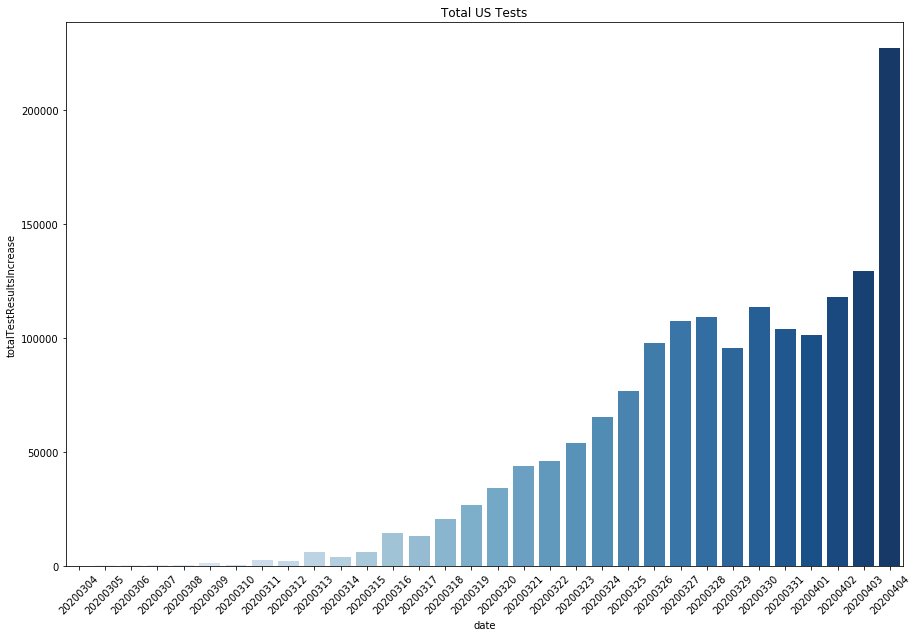

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="date", y="totalTestResultsIncrease", data=us_tests, palette="Blues", ax=ax)
# ax2 = ax.twinx()
# sns.lineplot(x="date", y="new_cases", data=ny, color="Red", ax=ax2)
plt.title("Total US Tests")

plt.xticks(rotation=45);
